In [ ]:
 import pandas as pd
 import plotly.express as px
 from prophet import Prophet

In [ ]:
import plotly.io as pio
pio.renderers.default='colab'

In [ ]:
import yfinance as yf

In [ ]:
stock = yf.Ticker("AAPL")
df = stock.history(period="1y")
print(df)

                                 Open        High         Low       Close  \
Date                                                                        
2023-09-25 00:00:00-04:00  173.313145  176.069047  173.263396  175.183578   
2023-09-26 00:00:00-04:00  173.929974  174.308029  170.786058  171.084534   
2023-09-27 00:00:00-04:00  171.741185  172.159045  168.189368  169.562332   
2023-09-28 00:00:00-04:00  168.477881  171.154189  166.766637  169.821014   
2023-09-29 00:00:00-04:00  171.144253  172.188910  169.472798  170.338379   
...                               ...         ...         ...         ...   
2024-09-17 00:00:00-04:00  215.750000  216.899994  214.500000  216.789993   
2024-09-18 00:00:00-04:00  217.550003  222.710007  217.539993  220.690002   
2024-09-19 00:00:00-04:00  224.990005  229.820007  224.630005  228.869995   
2024-09-20 00:00:00-04:00  229.970001  233.089996  227.619995  228.199997   
2024-09-23 00:00:00-04:00  227.339996  229.449997  225.860001  228.800003   

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-09-25 00:00:00-04:00 to 2024-09-23 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Volume        251 non-null    int64  
 5   Dividends     251 non-null    float64
 6   Stock Splits  251 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 15.7 KB


In [ ]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000,251.0
mean,192.507415,194.306118,190.870570,192.703298,5.963936e+07,0.003904,0.0
std,19.834927,20.087822,19.394838,19.775697,2.974784e+07,0.030749,0.0
min,164.935118,165.982480,163.668309,164.585999,1.814565e+07,0.000000,0.0
25%,175.211430,177.173981,174.064305,176.177574,4.495155e+07,0.000000,0.0
50%,188.853373,189.949203,187.478577,188.693985,5.299080e+07,0.000000,0.0
75%,211.550130,214.301952,208.598559,211.310410,6.551875e+07,0.000000,0.0
max,236.206595,236.955728,232.820515,234.548523,3.185822e+08,0.250000,0.0


In [ ]:
df_reset = df.reset_index()
df_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Date          251 non-null    datetime64[ns, America/New_York]
 1   Open          251 non-null    float64                         
 2   High          251 non-null    float64                         
 3   Low           251 non-null    float64                         
 4   Close         251 non-null    float64                         
 5   Volume        251 non-null    int64                           
 6   Dividends     251 non-null    float64                         
 7   Stock Splits  251 non-null    float64                         
dtypes: datetime64[ns, America/New_York](1), float64(6), int64(1)
memory usage: 15.8 KB


In [ ]:
px.area(df_reset, x = "Date", y= "Close")

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [ ]:
px.line(df_reset, x = "Date", y= "Close")

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [ ]:
px.box(df_reset, y='Close')

In [ ]:
columns = ['Date', 'Close']
new_df = pd.DataFrame(df_reset, columns=columns)
new_df

,Date,Close
0,2023-09-25 00:00:00-04:00,175.183578
1,2023-09-26 00:00:00-04:00,171.084534
2,2023-09-27 00:00:00-04:00,169.562332
3,2023-09-28 00:00:00-04:00,169.821014
4,2023-09-29 00:00:00-04:00,170.338379
...,...,...
246,2024-09-17 00:00:00-04:00,216.789993
247,2024-09-18 00:00:00-04:00,220.690002
248,2024-09-19 00:00:00-04:00,228.869995
249,2024-09-20 00:00:00-04:00,228.199997


In [ ]:
prophet_df= new_df.rename(columns={'Date':'ds', 'Close':'y'})
prophet_df

,ds,y
0,2023-09-25 00:00:00-04:00,175.183578
1,2023-09-26 00:00:00-04:00,171.084534
2,2023-09-27 00:00:00-04:00,169.562332
3,2023-09-28 00:00:00-04:00,169.821014
4,2023-09-29 00:00:00-04:00,170.338379
...,...,...
246,2024-09-17 00:00:00-04:00,216.789993
247,2024-09-18 00:00:00-04:00,220.690002
248,2024-09-19 00:00:00-04:00,228.869995
249,2024-09-20 00:00:00-04:00,228.199997


Create Facebook Prophet model

In [ ]:
prophet_df['ds'] = prophet_df['ds'].dt.tz_localize(None)


In [ ]:
m = Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwob7r768/5by7nzfi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwob7r768/0wv1s6z3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44043', 'data', 'file=/tmp/tmpwob7r768/5by7nzfi.json', 'init=/tmp/tmpwob7r768/0wv1s6z3.json', 'output', 'file=/tmp/tmpwob7r768/prophet_modelnx27sdpo/prophet_model-20240923150432.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:04:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:04:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecasting

In [ ]:
future_df= m.make_future_dataframe(periods=30)
forecast_df= m.predict(future_df)
forecast_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-09-25,170.145720,163.369873,174.920440,170.145720,170.145720,-0.816478,-0.816478,-0.816478,-0.816478,-0.816478,-0.816478,0.0,0.0,0.0,169.329242
1,2023-09-26,170.439843,163.636596,175.024394,170.439843,170.439843,-0.941388,-0.941388,-0.941388,-0.941388,-0.941388,-0.941388,0.0,0.0,0.0,169.498455
2,2023-09-27,170.733966,163.661801,175.885223,170.733966,170.733966,-0.967062,-0.967062,-0.967062,-0.967062,-0.967062,-0.967062,0.0,0.0,0.0,169.766904
3,2023-09-28,171.028088,164.017446,175.562815,171.028088,171.028088,-0.923359,-0.923359,-0.923359,-0.923359,-0.923359,-0.923359,0.0,0.0,0.0,170.104729
4,2023-09-29,171.322211,164.990379,176.542104,171.322211,171.322211,-0.509357,-0.509357,-0.509357,-0.509357,-0.509357,-0.509357,0.0,0.0,0.0,170.812854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2024-10-19,223.815907,219.305650,232.307114,221.587549,226.337379,2.078823,2.078823,2.078823,2.078823,2.078823,2.078823,0.0,0.0,0.0,225.894730
277,2024-10-20,223.817348,219.212893,232.487613,221.409970,226.543232,2.078821,2.078821,2.078821,2.078821,2.078821,2.078821,0.0,0.0,0.0,225.896169
278,2024-10-21,223.818789,216.305658,230.189320,221.253394,226.744486,-0.816478,-0.816478,-0.816478,-0.816478,-0.816478,-0.816478,0.0,0.0,0.0,223.002310
279,2024-10-22,223.820229,216.362771,229.980460,221.124899,226.828515,-0.941388,-0.941388,-0.941388,-0.941388,-0.941388,-0.941388,0.0,0.0,0.0,222.878841


In [ ]:
px.line(forecast_df, x= 'ds', y='yhat')

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



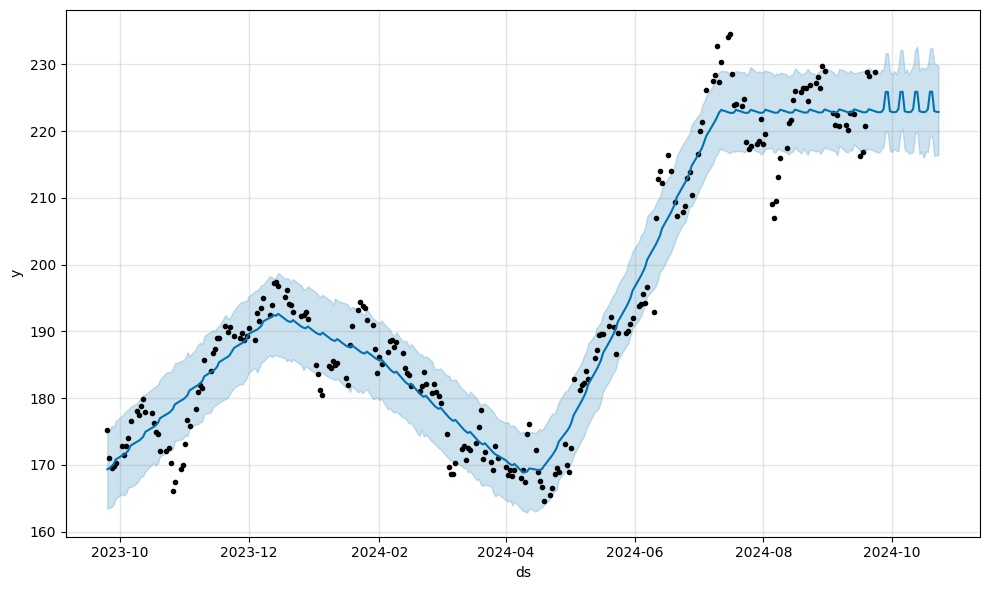

In [ ]:
figure= m.plot(forecast_df, xlabel='ds', ylabel='y')

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



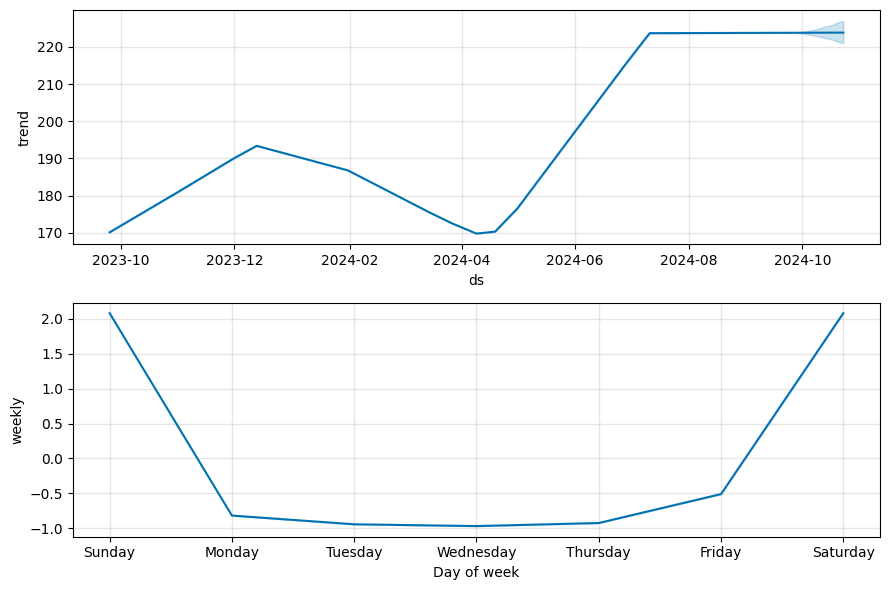

In [ ]:
figure2 = m.plot_components(forecast_df)

Download forecast data

In [ ]:
from google.colab import files
forecast_df.to_csv('forecast-apple-stock.csv')
files.download('forecast-apple-stock.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>